In [1]:
import os
import sys
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_columns", 200)
from tqdm import tqdm
tqdm.pandas()
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models , transforms

In [7]:
class Model:
    def __init__(self, path):
        self.model = models.mobilenet_v2(weights=None)
        self.model.classifier[1] = torch.nn.Linear(
            in_features=1280, out_features=2, bias=True
        )
        self.model.load_state_dict(torch.load(path, map_location=torch.device("cpu")))
        self.model.eval()

    def __call__(self, image):
        return self.model(image)

In [8]:
model = Model("./models/gender_v1.pth")

In [9]:
image_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

decode_answer = {
    0: "Male",
    1: "Female",
}

In [10]:
def prepare_image(image):
    image = Image.open(image).convert('RGB')
    image = image_transforms(image).unsqueeze(0)
    return image

def get_predict(image):
    int_predict = torch.max(model(image), 1)[1].numpy()[0]
    str_predict = decode_answer[int_predict]
    return str_predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Result: Male


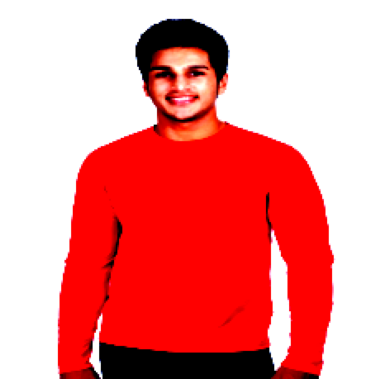

In [11]:
img = prepare_image("./models/sample.jpg")
print("Result:" , get_predict(img))
plt.imshow(torch.permute(img[0], (1, 2, 0)))
plt.axis(False);